In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import time
import matplotlib.pyplot as plt

In [20]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [21]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainset, valset = torch.utils.data.random_split(trainset, [40000, 10000])
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
partition = {'train': trainset, 'val':valset, 'test':testset}

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32]) 3
torch.Size([32, 32, 3])


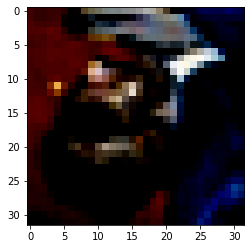

In [25]:
for i,j in testset:
    print(i.shape,j)
    i=i.transpose(0,2)
    print(i.shape)
    i=np.array(i)
    plt.imshow(i)
    break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image indices: [ 2732 21243 30403 32103 20757 14935 15430 39512]
torch.Size([3, 67, 133])


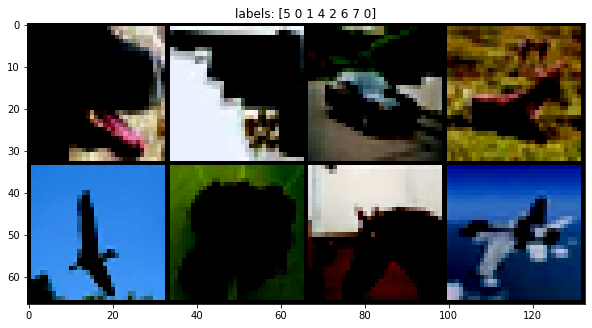

In [26]:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(0)

# define helper function
def show(img, y=None, color=True):
    npimg = img.numpy()
    npimg_tr = np.transpose(npimg, (1,2,0))

    plt.imshow(npimg_tr)
    if y is not None:
        plt.title('labels: ' + str(np.array(y)))

# pick random samples
grid_size = 8
rnd_inds = np.random.randint(0, len(trainset), grid_size)
print('image indices:', rnd_inds)

# create a grid from the sample images
x_grid = [trainset[i][0] for i in rnd_inds]
y_grid = [trainset[i][1] for i in rnd_inds]

x_grid = utils.make_grid(x_grid, nrow=4, padding=1)
print(x_grid.shape)

plt.figure(figsize=(10.0, 10.0))
show(x_grid, y_grid)

In [27]:
y_train=[y for _,y in trainset]
y_val=[y for _,y in valset]
y_test=[y for _,y in testset]

In [28]:
y_train

[6,
 1,
 5,
 9,
 3,
 3,
 0,
 7,
 0,
 8,
 2,
 0,
 3,
 4,
 3,
 2,
 3,
 9,
 8,
 7,
 4,
 6,
 7,
 1,
 8,
 2,
 9,
 6,
 0,
 6,
 7,
 2,
 7,
 4,
 5,
 4,
 0,
 8,
 4,
 0,
 8,
 3,
 9,
 2,
 7,
 6,
 6,
 4,
 1,
 8,
 5,
 7,
 4,
 2,
 3,
 3,
 8,
 1,
 1,
 5,
 4,
 4,
 9,
 0,
 4,
 1,
 9,
 5,
 2,
 8,
 4,
 5,
 1,
 3,
 9,
 6,
 2,
 4,
 7,
 6,
 6,
 3,
 2,
 0,
 3,
 0,
 9,
 9,
 9,
 7,
 2,
 5,
 7,
 6,
 2,
 9,
 1,
 1,
 2,
 2,
 1,
 7,
 8,
 6,
 9,
 6,
 4,
 6,
 9,
 3,
 2,
 2,
 2,
 8,
 6,
 3,
 8,
 3,
 8,
 7,
 4,
 6,
 1,
 8,
 1,
 5,
 2,
 1,
 5,
 7,
 2,
 8,
 1,
 4,
 0,
 8,
 6,
 1,
 2,
 5,
 5,
 3,
 7,
 4,
 9,
 5,
 7,
 2,
 9,
 9,
 2,
 4,
 4,
 3,
 7,
 1,
 3,
 4,
 4,
 7,
 2,
 4,
 1,
 2,
 4,
 2,
 1,
 2,
 8,
 7,
 8,
 5,
 9,
 6,
 8,
 8,
 2,
 3,
 7,
 6,
 6,
 3,
 9,
 2,
 2,
 5,
 6,
 0,
 6,
 1,
 5,
 8,
 0,
 0,
 0,
 7,
 4,
 0,
 2,
 0,
 7,
 9,
 1,
 8,
 5,
 4,
 2,
 8,
 4,
 6,
 0,
 3,
 5,
 6,
 3,
 8,
 5,
 6,
 2,
 0,
 7,
 0,
 0,
 2,
 2,
 0,
 3,
 3,
 7,
 8,
 9,
 3,
 7,
 0,
 1,
 7,
 8,
 8,
 2,
 0,
 0,
 4,
 5,
 8,
 1,
 1,
 5,
 9,
 6,
 7,


In [30]:
y_train=np.array(y_train)
y_val=np.array(y_val)
y_test=np.array(y_test)

In [31]:
import collections

In [32]:
counter_train = collections.Counter(y_train)
counter_val = collections.Counter(y_val)
counter_test = collections.Counter(y_test)
print(counter_train)
print(counter_val)
print(counter_test)

Counter({2: 4038, 7: 4029, 3: 4027, 4: 4018, 8: 4014, 0: 4012, 5: 3999, 6: 3970, 9: 3965, 1: 3928})
Counter({1: 1072, 9: 1035, 6: 1030, 5: 1001, 0: 988, 8: 986, 4: 982, 3: 973, 7: 971, 2: 962})
Counter({3: 1000, 8: 1000, 0: 1000, 6: 1000, 1: 1000, 9: 1000, 5: 1000, 7: 1000, 4: 1000, 2: 1000})


(N - F) / Stride + 1

In [104]:
class Basic_CNN(nn.Module):
    def __init__(self):
        super(Basic_CNN, self).__init__()
        self.conv1=nn.Conv2d(in_channels=3,
                            out_channels=32,
                            kernel_size=6,
                            stride=2,
                            padding=2)
        self.conv2=nn.Conv2d(in_channels=32,
                            out_channels=64,
                            kernel_size=5,
                            stride=2,
                            padding=2)
        self.conv3=nn.Conv2d(in_channels=64,
                            out_channels=128,
                            kernel_size=3,
                            stride=1,
                            padding=1)
        self.maxpool1=nn.MaxPool2d(kernel_size=2,
                                  stride=2)
        self.act=nn.ReLU()
        self.fc = nn.Linear(2048,10)
    def forward(self,x):
        x=self.conv1(x)
        x1=self.act(x)
        x1=self.conv2(x1)
        x1=self.act(x1)
        x2=self.conv3(x1)
        x2=self.act(x2)
        x2=self.maxpool1(x2)
        x2=x2.view(x2.size(0),-1)
        x2=self.fc(x2)
        return x, x1, x2

In [105]:
def dimension_check():
    net=Basic_CNN()
    x=torch.randn(1,3,32,32)
    _,_,y=net(x)
    print(y.size())

In [106]:
dimension_check()

torch.Size([1, 10])


In [107]:
def train(net,partition,optimizer,criterion):
    trainloader = torch.utils.data.DataLoader(partition['train'],
                                             batch_size=128,
                                             shuffle=True)
    net.train()
    correct = 0
    total =0
    train_loss = 0.0
    for i, data in enumerate(tqdm(trainloader, 0)):
        time.sleep(0.0000001)
        optimizer.zero_grad()
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()
        #outputs = net(inputs)
        _,_,outputs = net(inputs)
        #break
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        #if i % 200 == 0:
        #    print(correct,train_loss)
    train_loss = train_loss / len(trainloader)
    train_acc = 100 * correct / total
    return net, train_loss, train_acc

In [108]:
def test(net, partition):
    testloader = torch.utils.data.DataLoader(partition['test'], 
                                             batch_size=128, 
                                             shuffle=False, num_workers=2)
    net.eval()
    
    correct = 0
    total = 0
    with torch.no_grad():
        for data in tqdm(testloader):
            time.sleep(0.0000001)
            images, labels = data
            images = images.cuda()
            labels = labels.cuda()
            #outputs = net(images)

            _,_,outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        test_acc = 100 * correct / total
    return test_acc

In [109]:
def validate(net, partition, criterion):
    valloader = torch.utils.data.DataLoader(partition['val'], 
                                            batch_size=128, 
                                            shuffle=False, num_workers=2)
    net.eval()

    correct = 0
    total = 0
    val_loss = 0 
    with torch.no_grad():
        for data in tqdm(valloader):
            time.sleep(0.0000001)
            images, labels = data
            images = images.cuda()
            labels = labels.cuda()
            #outputs = net(images)
            _,_,outputs = net(images)

            loss = criterion(outputs, labels)
            
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(valloader)
        val_acc = 100 * correct / total
    return val_loss, val_acc

In [110]:
from tqdm import tqdm, tqdm_notebook
from tqdm import trange
import time

In [111]:
seed = 123
np.random.seed(seed)
torch.manual_seed(seed)
net=Basic_CNN()
net.cuda()
criterion=nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0015, weight_decay=0.00001)
train_losses=[]
val_losses=[]
train_accs=[]
val_accs=[]
for epoch in range(10):
    ts=time.time()
    net, train_loss,train_acc=train(net, partition, optimizer, criterion)
    val_loss, val_acc = validate(net, partition, criterion)
    te=time.time()
    print('time : {:2.2f}, train_loss : {:2.2f}, train_acc : {:2.2f},val_acc : {:2.2f},val_loss : {:2.2f}'.format(te-ts,train_loss,train_acc,val_acc,val_loss))
    train_loss=round(train_loss,2)
    val_loss=round(val_loss,2)
    train_acc=round(train_acc,2)
    val_acc=round(val_acc,2)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
test_acc = test(net,partition)
test_acc=round(test_acc,2)

  2%|▏         | 5/313 [00:00<00:06, 48.42it/s]

time : 6.44, train_loss : 1.52, train_acc : 44.99,val_acc : 54.88,val_loss : 1.27


  2%|▏         | 6/313 [00:00<00:05, 52.93it/s]

time : 6.31, train_loss : 1.15, train_acc : 59.65,val_acc : 60.74,val_loss : 1.12


  2%|▏         | 5/313 [00:00<00:07, 43.81it/s]

time : 6.42, train_loss : 0.98, train_acc : 65.58,val_acc : 64.65,val_loss : 1.00


  2%|▏         | 6/313 [00:00<00:05, 52.81it/s]

time : 6.49, train_loss : 0.85, train_acc : 70.25,val_acc : 65.88,val_loss : 0.97


  2%|▏         | 5/313 [00:00<00:06, 49.78it/s]

time : 6.65, train_loss : 0.75, train_acc : 74.10,val_acc : 67.24,val_loss : 0.96


  2%|▏         | 5/313 [00:00<00:06, 45.31it/s]

time : 6.44, train_loss : 0.66, train_acc : 76.97,val_acc : 67.78,val_loss : 0.95


  2%|▏         | 5/313 [00:00<00:07, 42.86it/s]

time : 6.47, train_loss : 0.58, train_acc : 79.83,val_acc : 67.84,val_loss : 1.01


  2%|▏         | 5/313 [00:00<00:07, 43.21it/s]

time : 6.51, train_loss : 0.49, train_acc : 82.78,val_acc : 66.50,val_loss : 1.07


  2%|▏         | 5/313 [00:00<00:06, 44.35it/s]

time : 6.55, train_loss : 0.42, train_acc : 85.14,val_acc : 67.14,val_loss : 1.15


  0%|          | 0/79 [00:00<?, ?it/s]

time : 6.57, train_loss : 0.36, train_acc : 87.06,val_acc : 67.39,val_loss : 1.16


100%|██████████| 79/79 [00:00<00:00, 110.43it/s]


In [71]:
np.save("basic_trainloss",train_losses)
np.save("basic_valloss",val_losses)
np.save("basic_trainacc",train_accs)
np.save("basic_valaccs",val_accs)

In [72]:
bts=np.load("basic_trainloss.npy")

In [73]:
bts

array([2.22, 2.05, 1.94, 1.85, 1.74])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[-0.3098, -0.3020, -0.2627,  ..., -0.2471, -0.2627, -0.2784],
         [-0.3882, -0.3882, -0.3882,  ..., -0.1843, -0.2784, -0.3020],
         [-0.4588, -0.4824, -0.4745,  ..., -0.3333, -0.3725, -0.3176],
         ...,
         [ 0.0824,  0.2784,  0.2314,  ..., -0.3647, -0.3333, -0.3882],
         [-0.1137,  0.2235,  0.2157,  ..., -0.4510, -0.5059, -0.4353],
         [-0.4039, -0.2157, -0.1216,  ...,  0.3412,  0.0667,  0.1843]],

        [[-0.0275, -0.0196,  0.0196,  ..., -0.5373, -0.5451, -0.5373],
         [-0.1137, -0.1059, -0.1059,  ..., -0.4510, -0.5451, -0.5529],
         [-0.1765, -0.2000, -0.1922,  ..., -0.5765, -0.6314, -0.5843],
         ...,
         [-0.2157,  0.0039, -0.0902,  ..., -0.6392, -0.5608, -0.5843],
         [-0.3961, -0.0667, -0.1608,  ..., -0.6471, -0.6941, -0.6235],
         [-0.6000, -0.4275, -0.4588,  ...,  0.2000, -0.1137, -0.0431]],

        [[-0.6706, -0.6784, -0.6549,  ..., -0.8745, -0.8353, -0.8353],
         [-0.7647, -0.7725, -0.7882,  ..., -0

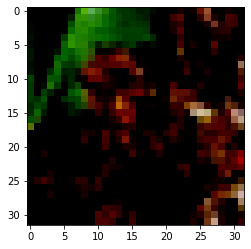

In [112]:
for i in trainset:
    i=i[0]
    print(i)
    i=i.transpose(0,2)
    i=np.array(i)
    plt.imshow(i)
    break

torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
(1, 64, 8, 8)


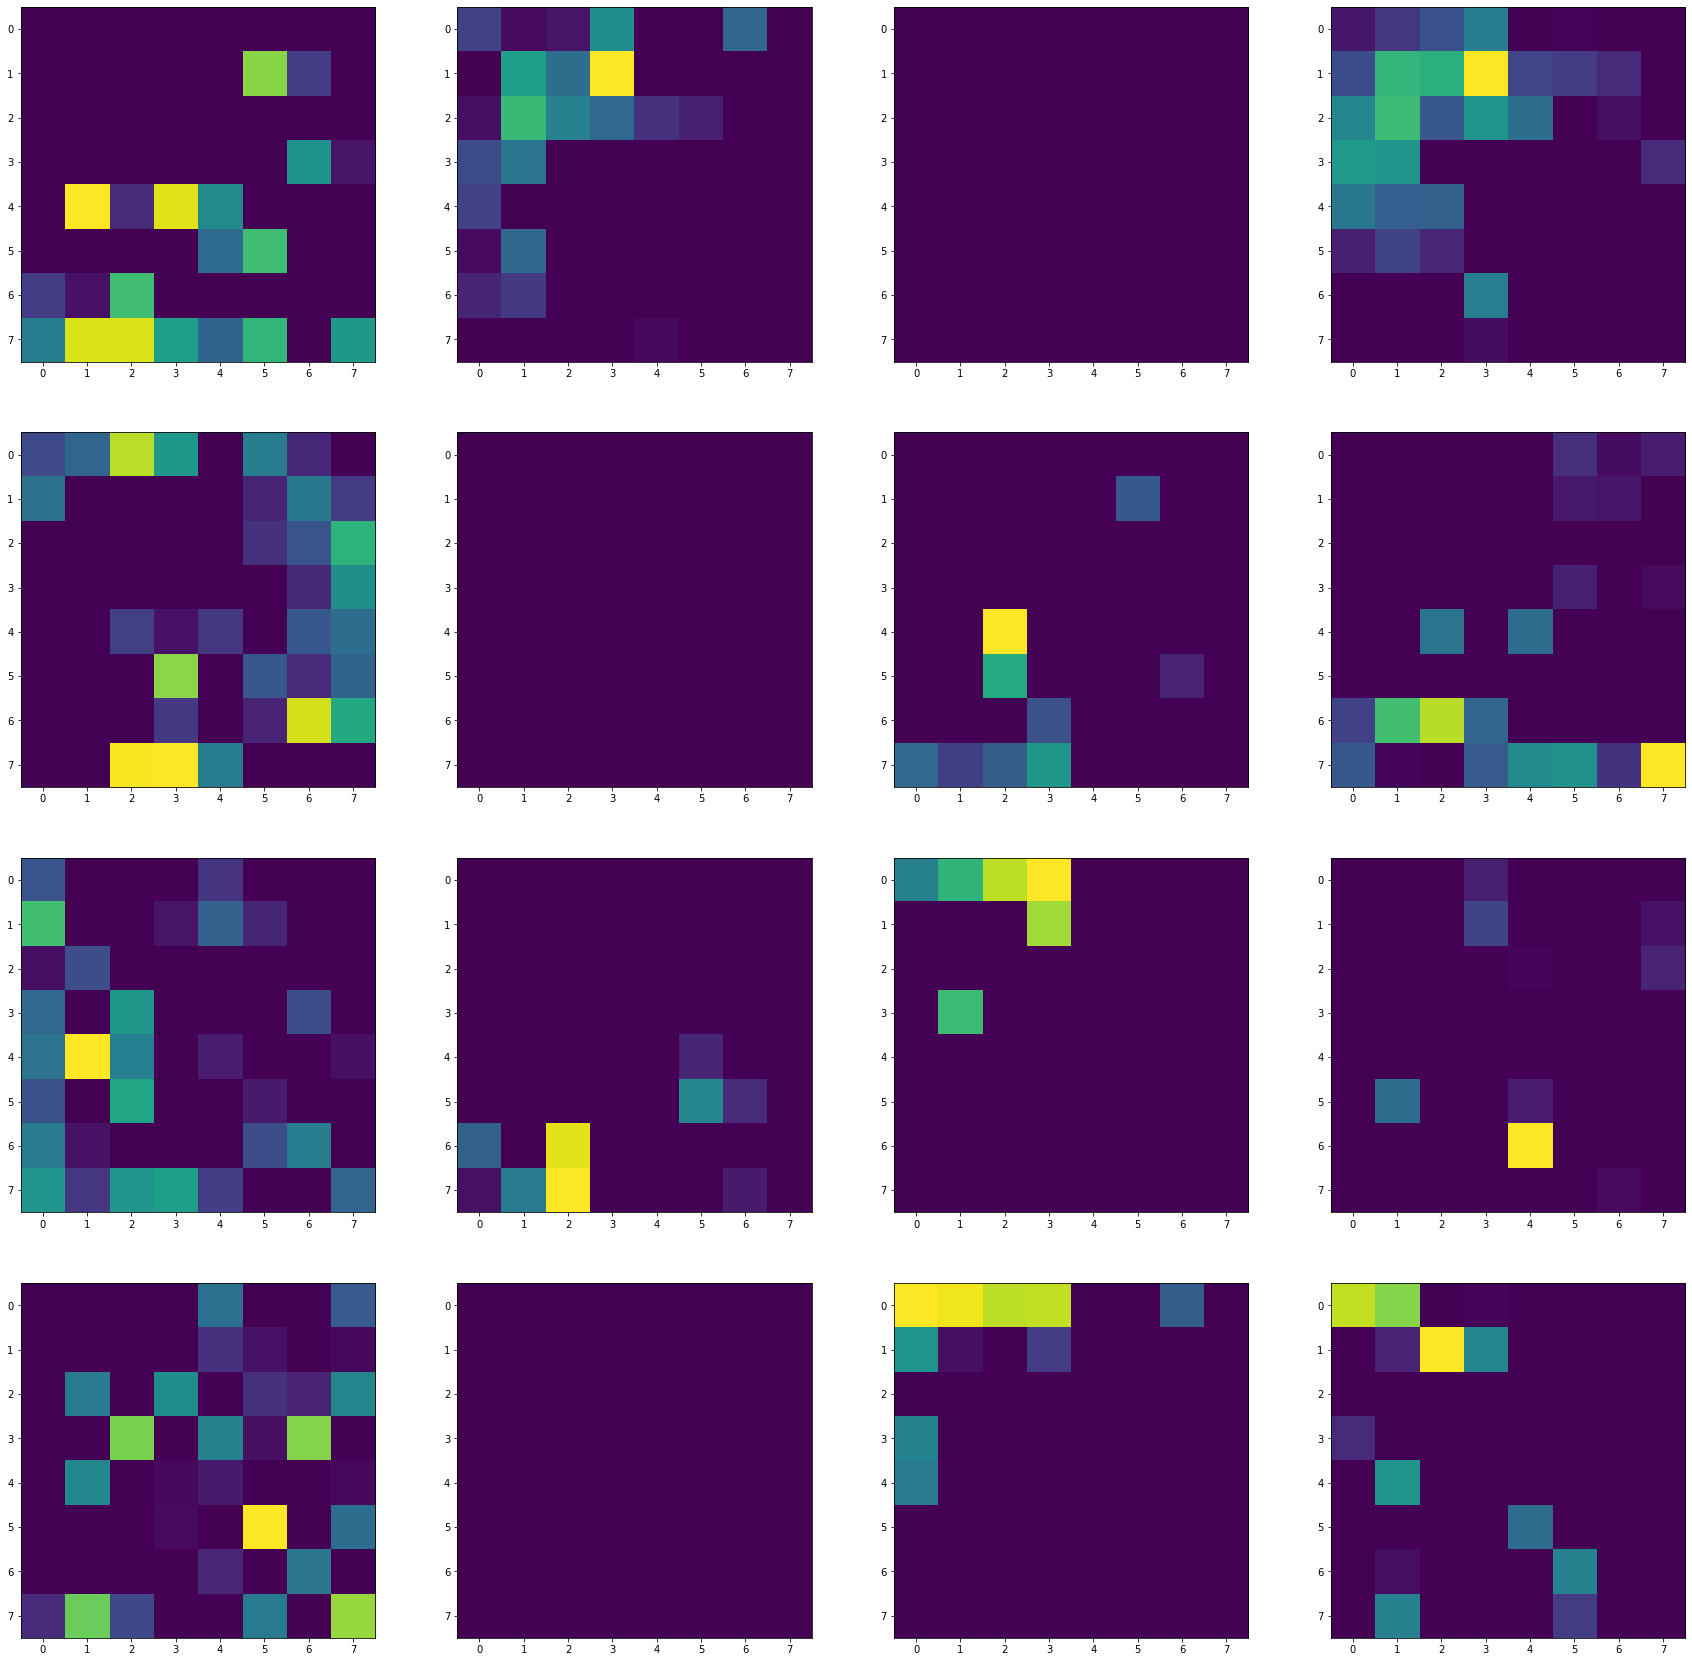

In [114]:
for i in trainset:
    print(i[0].shape)
    j=i[0]
    j=np.array(j)
    j=torch.FloatTensor([j])
    print(j.shape)
    j=j.cuda()
    x,y,z=net(j)
    y=y.cpu()
    y=y.detach().numpy()
    x=np.array(y)
    print(x.shape)
    #y=np.array(y)
    plt.figure(figsize=(30,30))
    plt.subplot(4,4,1)
    plt.imshow(x[0][0])
    plt.subplot(4,4,2)
    plt.imshow(x[0][1])
    plt.subplot(4,4,3)
    plt.imshow(x[0][2])
    plt.subplot(4,4,4)
    plt.imshow(x[0][3])
    plt.subplot(4,4,5)
    plt.imshow(x[0][4])
    plt.subplot(4,4,6)
    plt.imshow(x[0][5])
    plt.subplot(4,4,7)
    plt.imshow(x[0][6])
    plt.subplot(4,4,8)
    plt.imshow(x[0][7])
    plt.subplot(4,4,9)
    plt.imshow(x[0][8])
    plt.subplot(4,4,10)
    plt.imshow(x[0][9])
    plt.subplot(4,4,11)
    plt.imshow(x[0][10])
    plt.subplot(4,4,12)
    plt.imshow(x[0][11])
    plt.subplot(4,4,13)
    plt.imshow(x[0][12])
    plt.subplot(4,4,14)
    plt.imshow(x[0][13])
    plt.subplot(4,4,15)
    plt.imshow(x[0][14])
    plt.subplot(4,4,16)
    plt.imshow(x[0][15])
    
    break